In [ ]:
#REFERENCE
#Exploration & Transforming Images in Python by MuonNeutrino in Kaggle
#clean_training_data.py by Katymn on github

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_json("train.json")
print ("Training data shape: ", df.shape, "\nColumns: ", df.columns, "\n")
df.head()

Training data shape:  (1604, 5) 
Columns:  Index(['id', 'band_1', 'band_2', 'inc_angle', 'is_iceberg'], dtype='object') 



,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [ ]:
df= df.replace("na", np.nan)

/tmp/ipython-input-2985322484.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace("na", np.nan)


In [ ]:
df.isnull().sum()

,0
id,0
band_1,0
band_2,0
inc_angle,133
is_iceberg,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()


,0
id,0
band_1,0
band_2,0
inc_angle,0
is_iceberg,0


In [ ]:
df["is_iceberg"].value_counts()

,count
is_iceberg,
1,753
0,718


In [ ]:
df["band_1"]= df["band_1"].apply(lambda x: np.array(x).reshape(75,75))
df["band_2"] = df["band_2"].apply(lambda x: np.array(x).reshape(75,75))
print(type(df["band_1"].iloc[0]))
print(df["band_1"].iloc[0])

<class 'numpy.ndarray'>
[[-27.878361 -27.15416  -28.668615 ... -25.573483 -26.488674 -30.507013]
 [-28.66853  -27.878401 -27.508776 ... -26.488632 -28.671562 -31.594166]
 [-28.66853  -27.15416  -25.865042 ... -27.157106 -27.881393 -32.837124]
 ...
 [-29.092905 -28.669163 -30.504612 ... -30.011005 -25.868538 -26.489265]
 [-31.591682 -27.878992 -28.669205 ... -27.512272 -26.817074 -27.512358]
 [-29.092905 -26.814081 -27.154791 ... -26.817032 -27.881983 -28.268127]]


Plotting images

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dividing images into icebergs and ships

In [ ]:
icebergs = df[df["is_iceberg"] == 1].sample(n = 9, random_state= 123)
ships = df[df["is_iceberg"] == 0].sample(n = 9, random_state= 123)


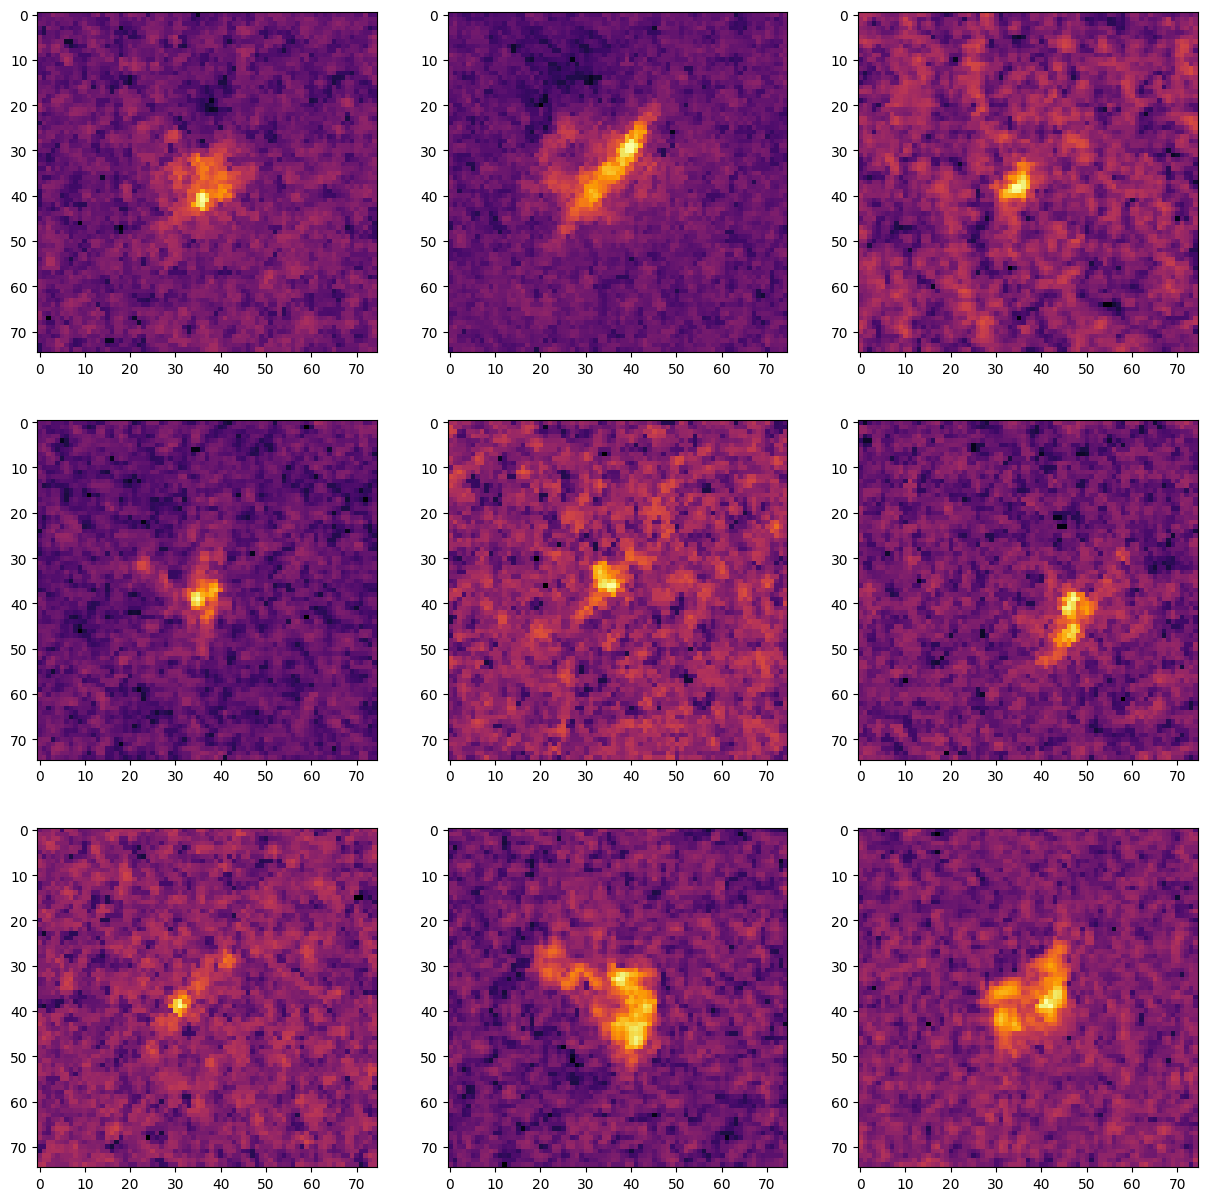

In [ ]:
# displaying 9 random iceberg pictures in band 1
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["band_1"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

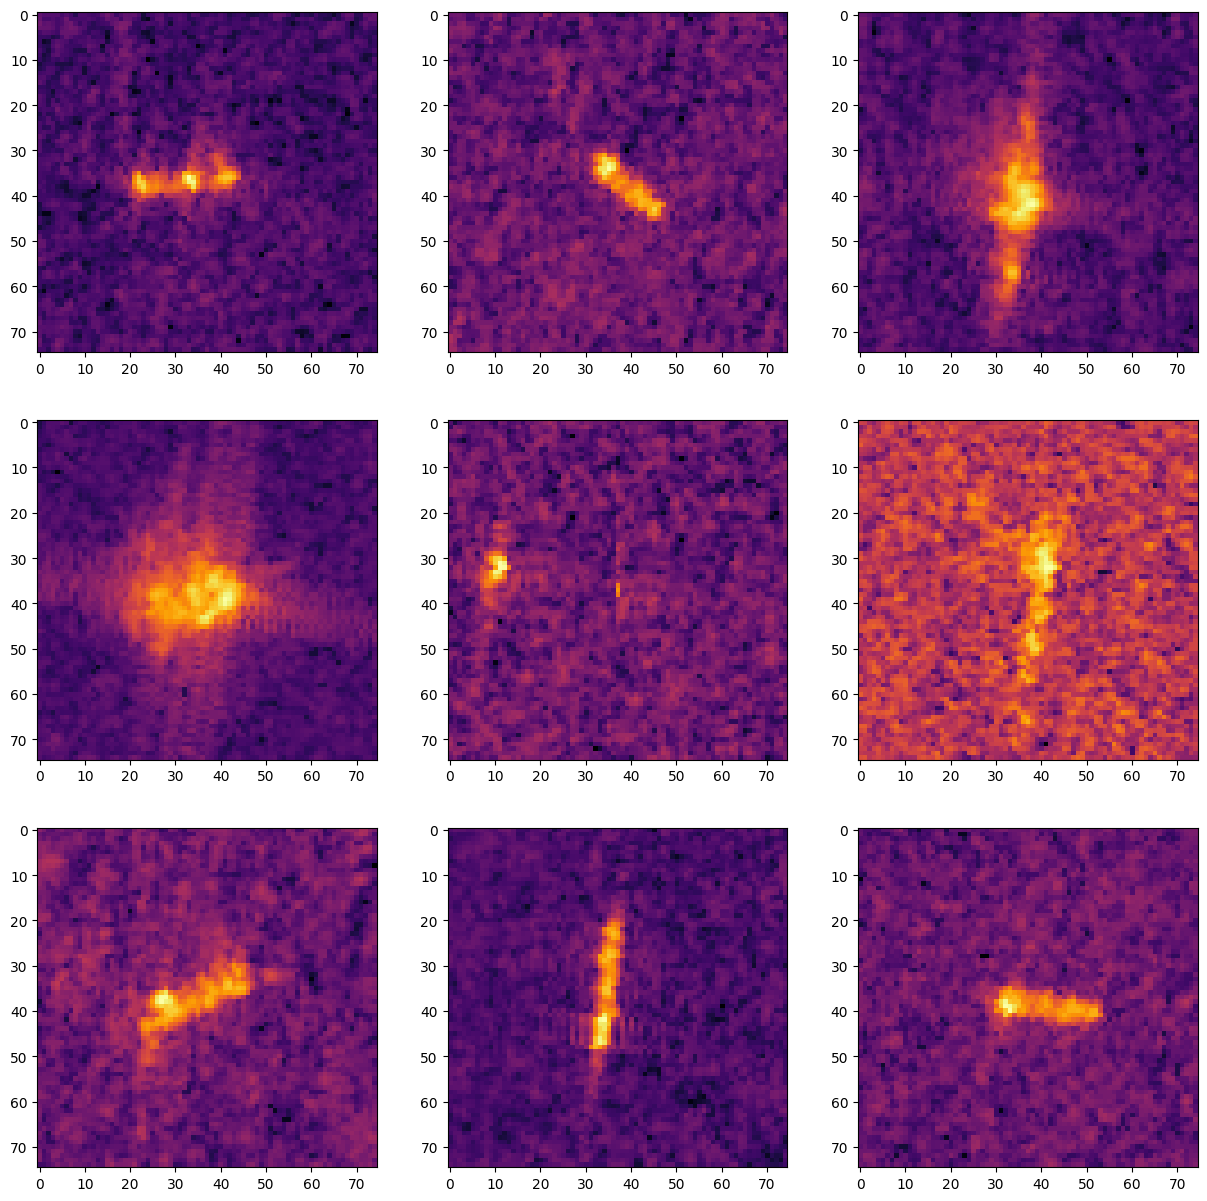

In [ ]:
# displaying 9 random ships pictures in band 1
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["band_1"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

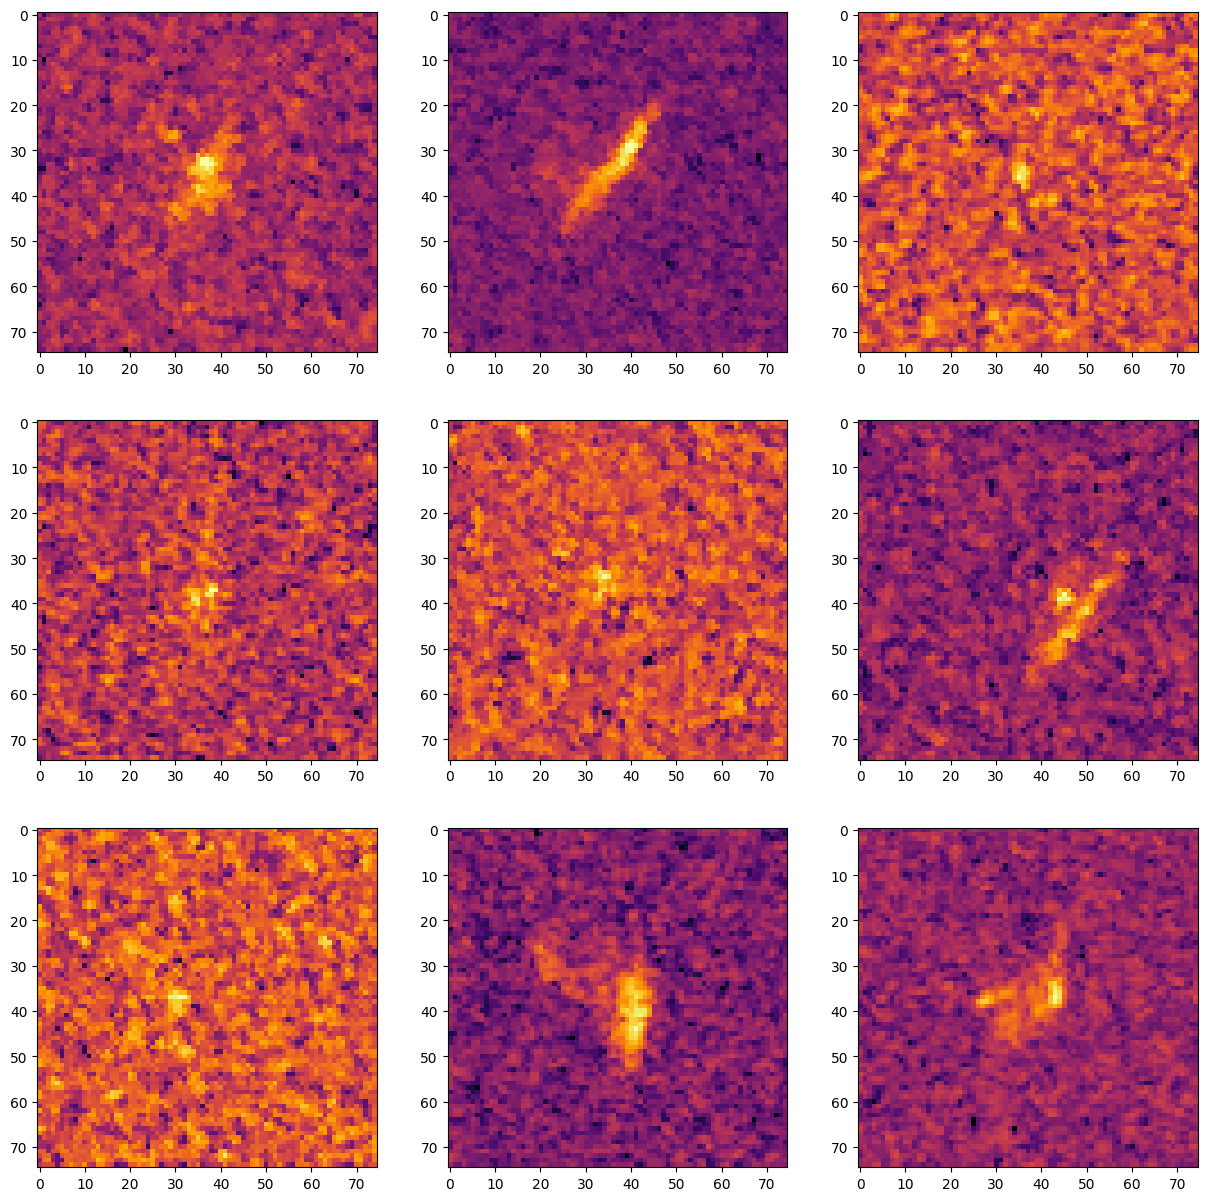

In [ ]:
# displaying 9 random iceberg pictures in band 2
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

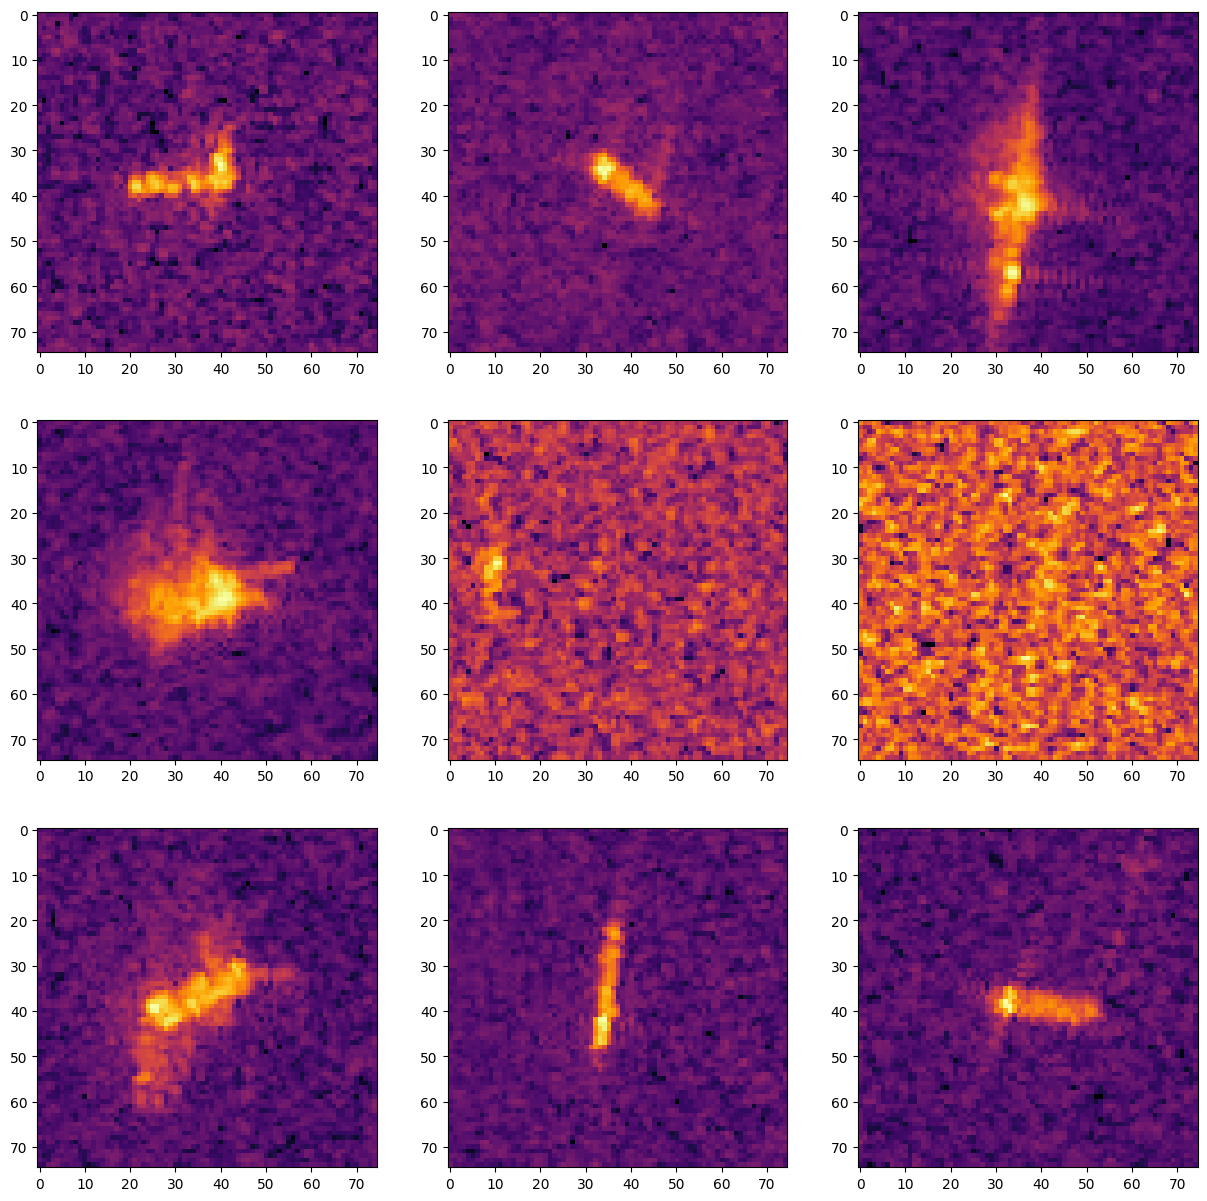

In [ ]:
# displaying 9 random ships pictures in band 2
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["band_2"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

Transforming the images  

Just to know in the future which type of images give the best output.
Finding a filter that separates background noise from the true signal
Since SAR objects have salt ad pepper noise, I'll try SMOOTHENING FILTERS  and MEDIAN FILTERS  
After I'm going to try a high-pass filter to sharpen the edge features.

In [ ]:
#Setting up different kernels
from scipy import signal
#edge detection (gradient) - based methods
xder = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])
#center-weighted average (weighted box) smoothing kernel for images with small signal size to reduce noise
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])

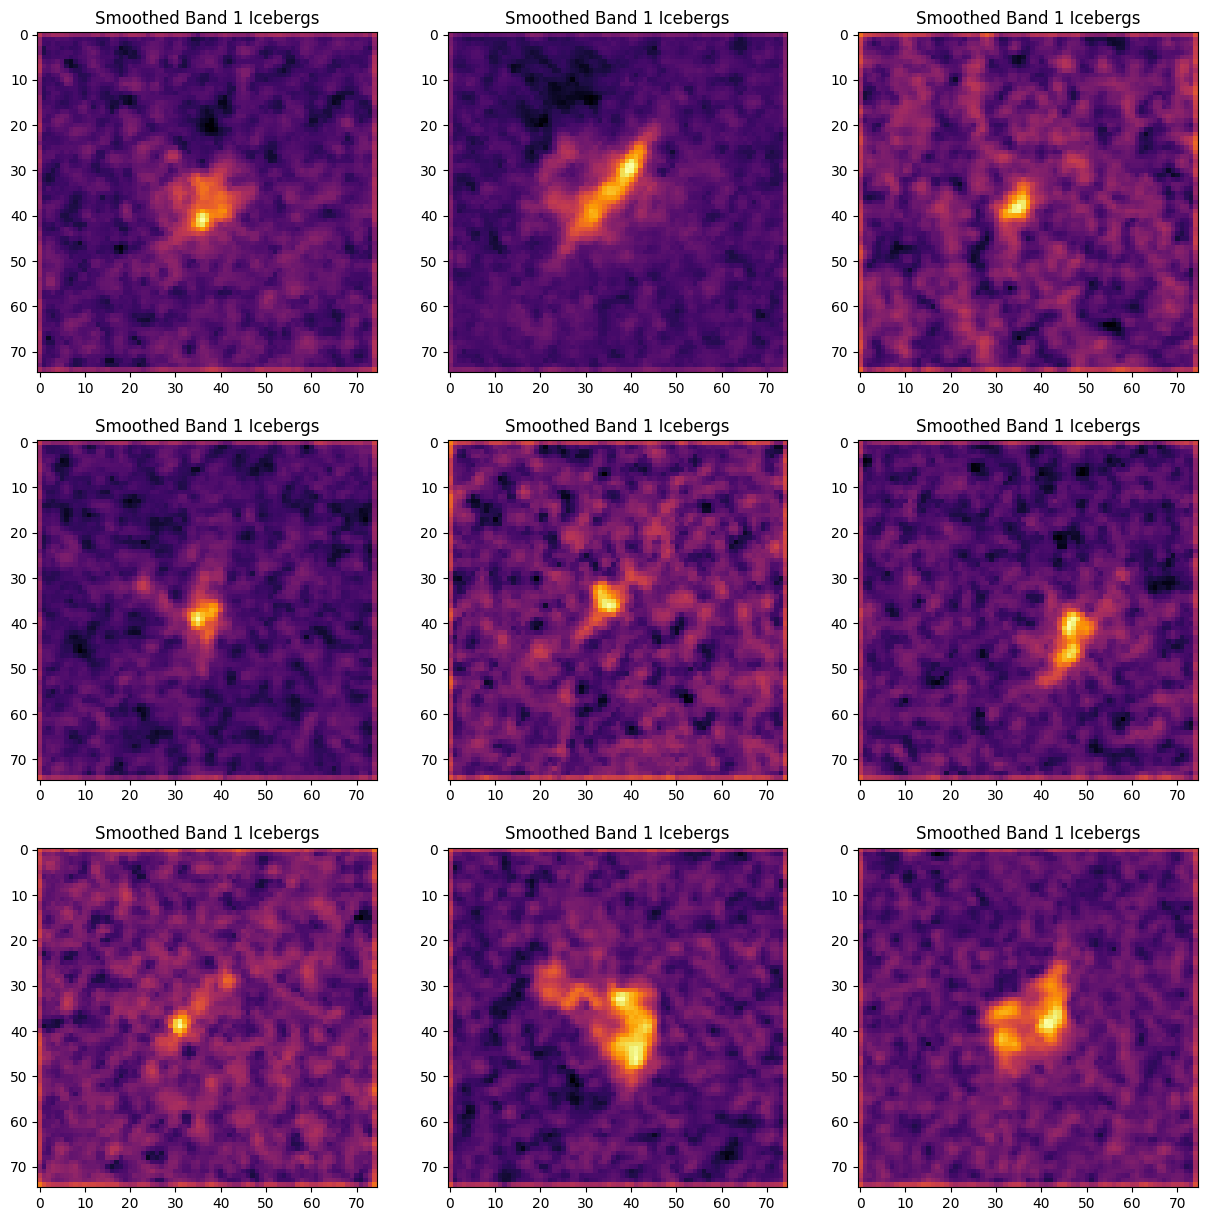

In [ ]:
#SMOOTHING
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  arr = signal.convolve2d(icebergs["band_1"].iloc[i], smooth, mode = "same")
  ax.imshow(arr, cmap ="inferno")
  ax.set_title ("Smoothed Band 1 Icebergs")

plt.show()

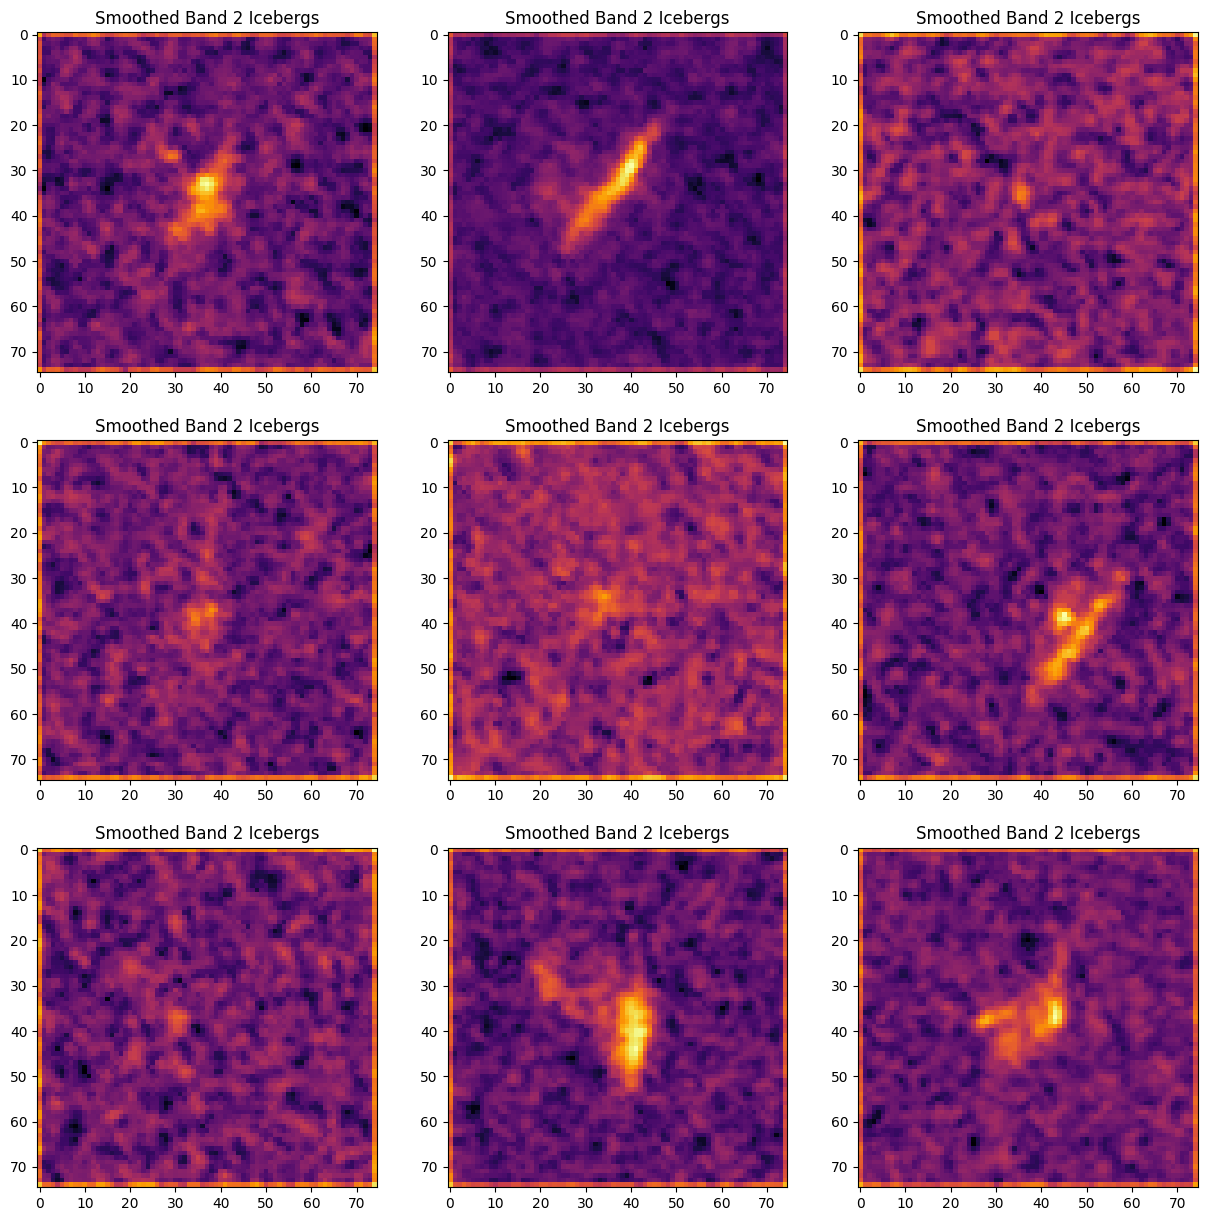

In [ ]:
#SMOOTHING
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  arr = signal.convolve2d(icebergs["band_2"].iloc[i], smooth, mode = "same")
  ax.imshow(arr, cmap ="inferno")
  ax.set_title ("Smoothed Band 2 Icebergs")
plt.show()

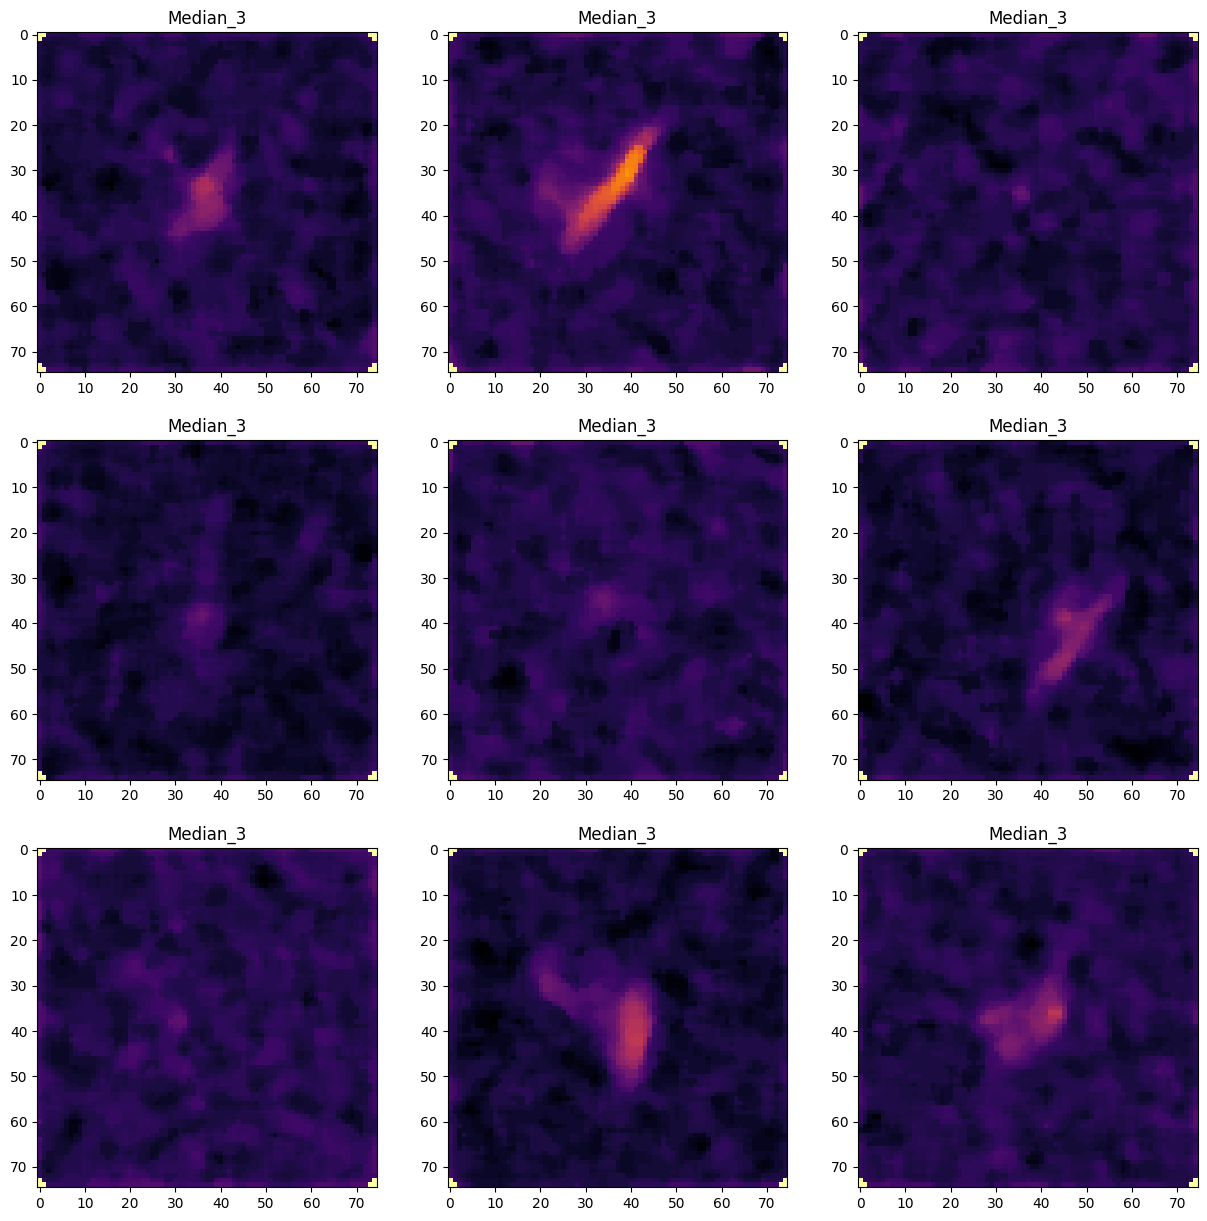

In [ ]:
#MEDIAN FILTER

fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  median_3 =signal.medfilt(arr, kernel_size=3)
  ax.imshow (median_3, cmap = "inferno")
  ax.set_title("Median_3")

plt.show()

Analysis: Smoothed images produced satisfactory results; however, the median_3 images appeared too blurry. Next, an edge detection filter will be applied, followed by sharpening the edges in both the smoothed and median_3 images.

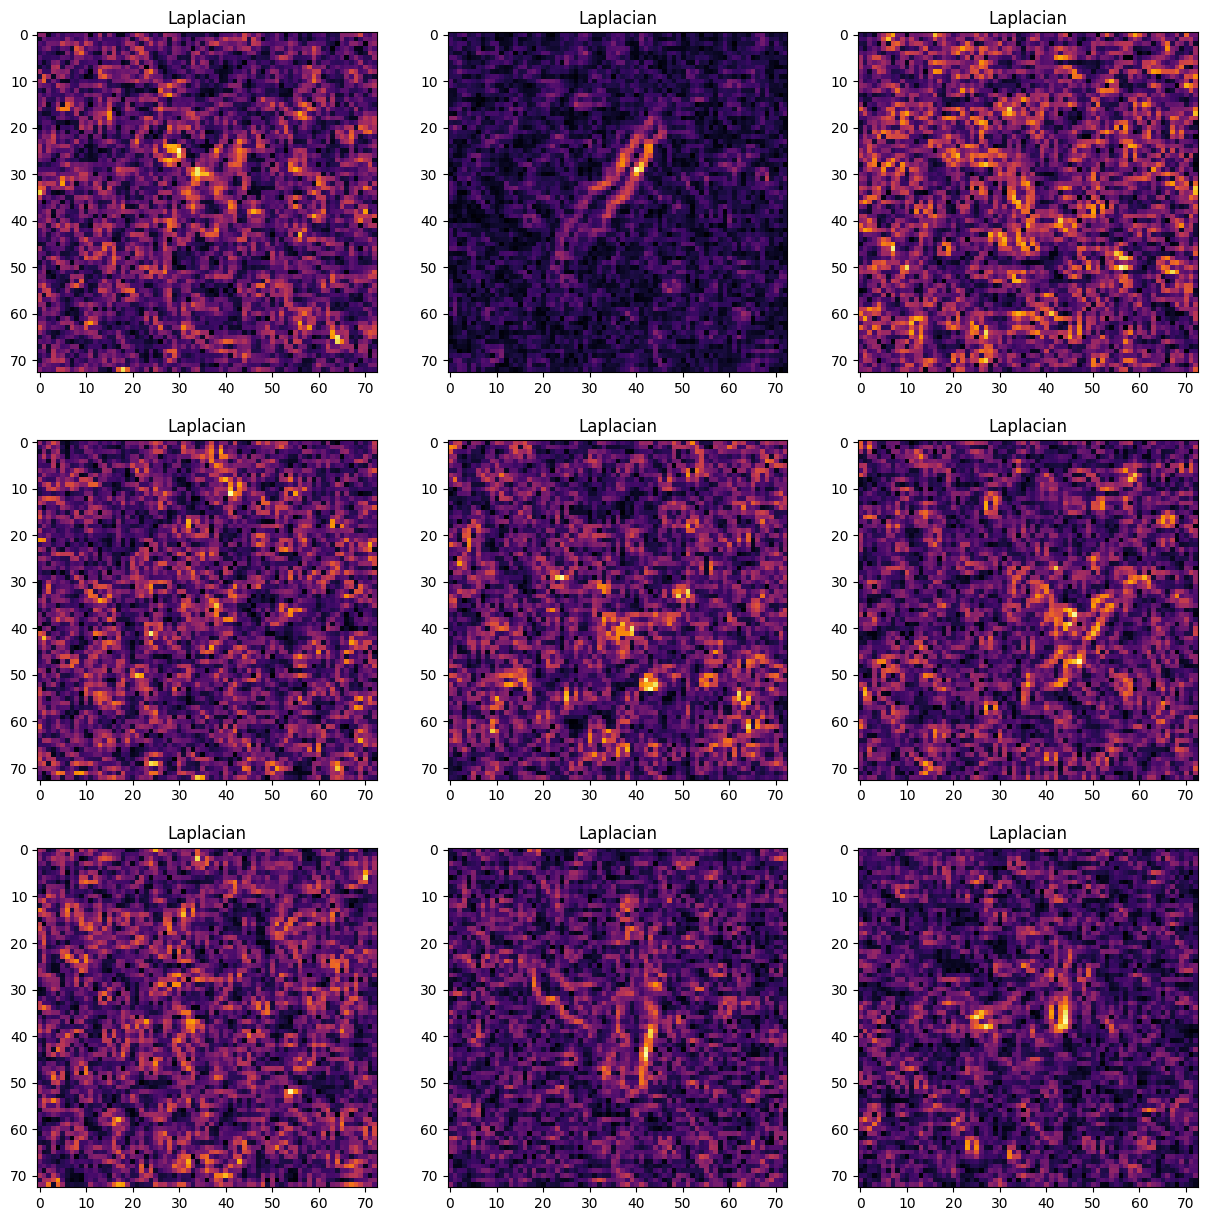

In [ ]:
#Second Derivatives (Laplacian)
fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arrx = signal.convolve2d(icebergs["band_2"].iloc[i], xder, mode ="valid")
  arry = signal.convolve2d(icebergs["band_2"].iloc[i], yder, mode ="valid")
  ax.imshow (np.hypot(arrx,arry), cmap = "inferno")
  ax.set_title("Laplacian")

plt.show()

In [ ]:
# High-pass filter kernel
high_pass = np.array([[-1,-1,-1],
                      [-1, 8,-1],
                      [-1,-1,-1]])

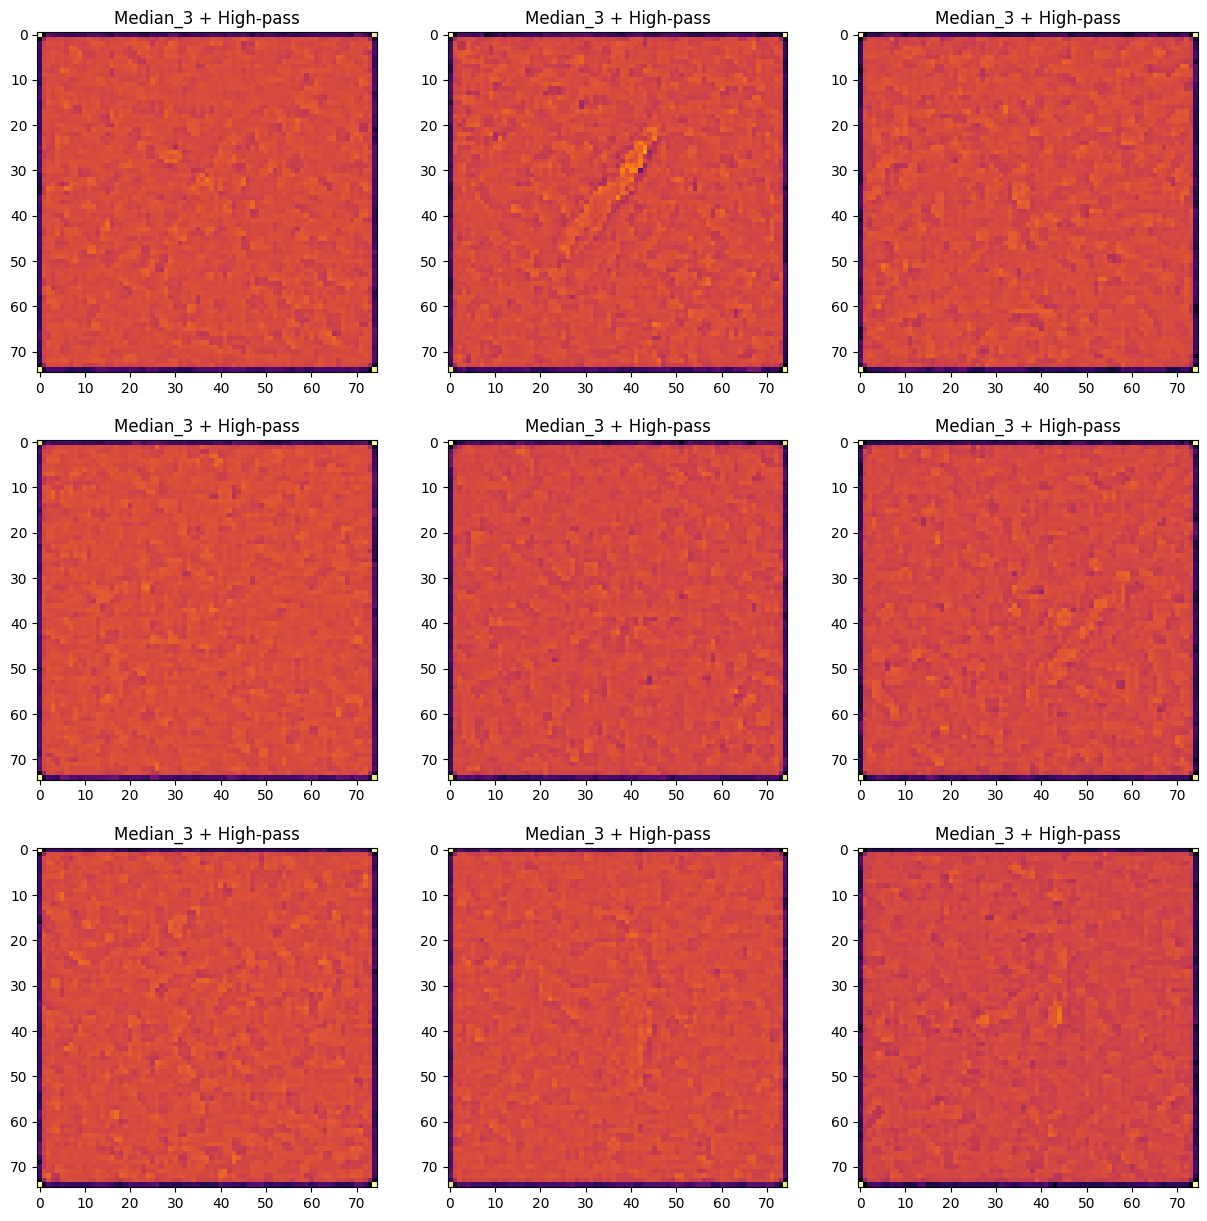

In [ ]:
#Applying a High Pass filter to the Median_3
fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  median_3 =signal.medfilt(arr, kernel_size=3)
  high_passed = signal.convolve2d (median_3, high_pass, mode ="same")
  ax.imshow (high_passed, cmap = "inferno")
  ax.set_title("Median_3 + High-pass")

plt.show()

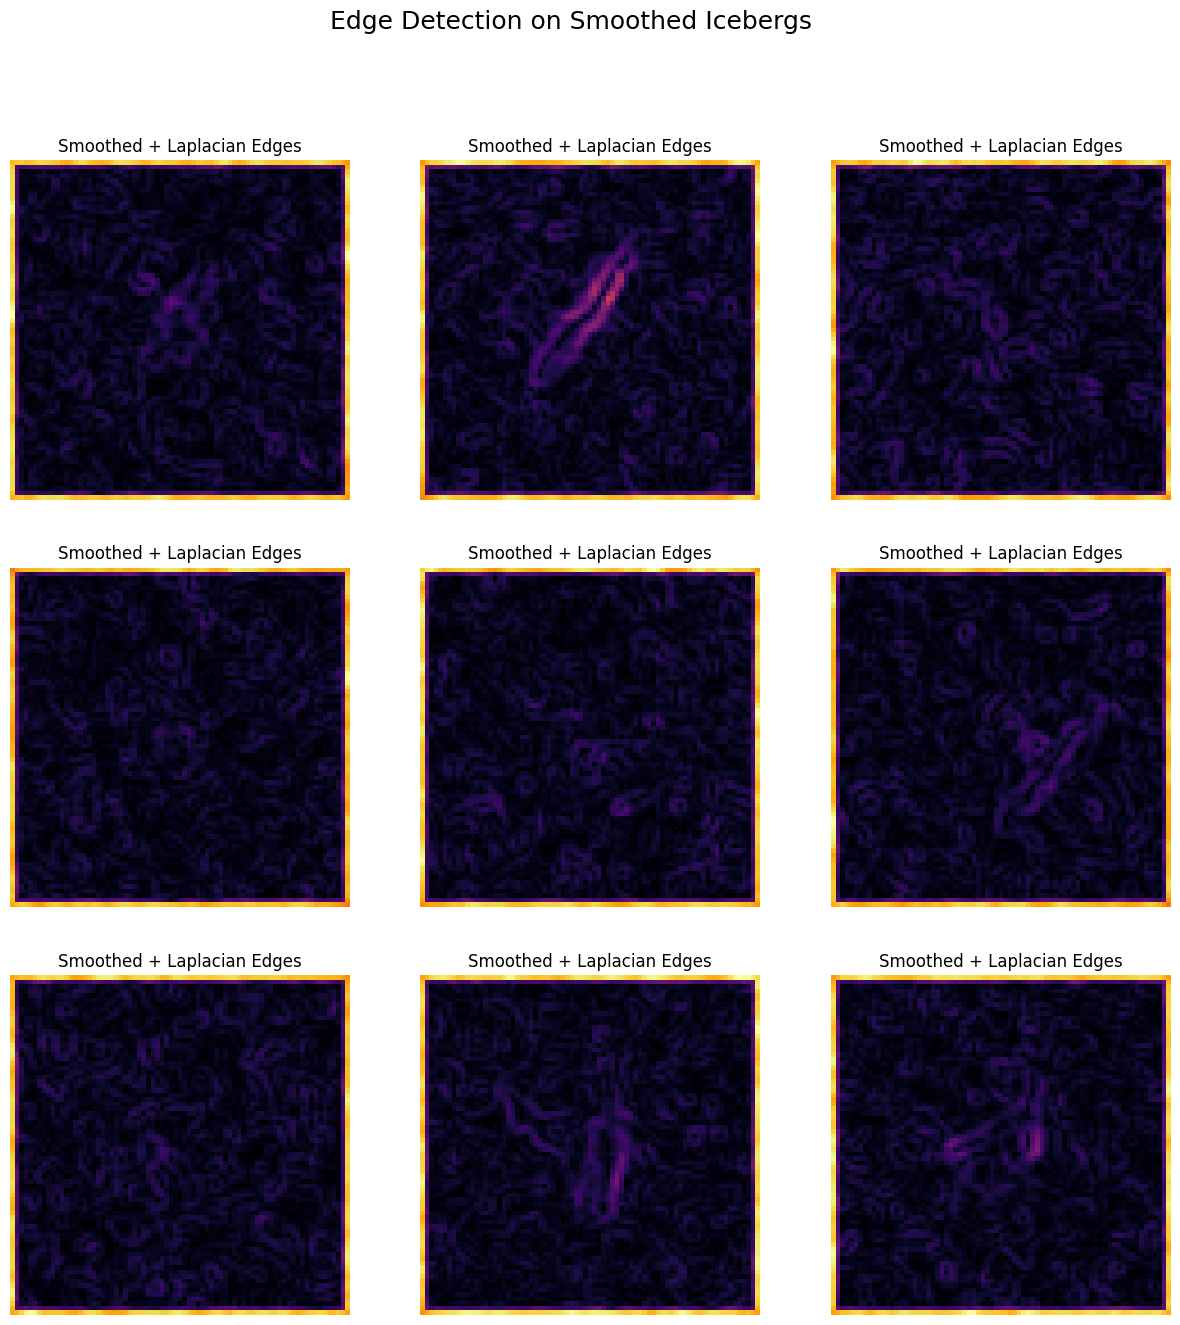

In [ ]:
#Applying a High Pass filter (Laplacian) to Smoothed
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  smoothed = signal.convolve2d(icebergs["band_2"].iloc[i], smooth, mode="same")
  grad_x = signal.convolve2d(smoothed, xder, mode="same")
  grad_y = signal.convolve2d(smoothed, yder, mode="same")

  edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)

  ax.imshow(edge_magnitude, cmap="inferno")
  ax.set_title("Smoothed + Laplacian Edges")
  ax.axis("off")

fig.suptitle("Edge Detection on Smoothed Icebergs", fontsize=18)
plt.show()

Analysis: Applying a smoothing filter or median filter first to denoise, followed by an edge detector to highlight structures, may not be effective. So far, the smoothed filter alone produced the best results.